In [2]:
''' 
Este material mostra o trabalho de EDA que fiz para familiarizar com o conjunto de dados e criar algumas visualizações básicas 
sobre os recursos extraídos. Para as parcelas, os verdes (à esquerda) correspondem a bons empréstimos e os vermelhos correspondem 
a empréstimos ruins (inadimplência) se definirmos inadimplência como aqueles empréstimos com status B ou D.'''


' \nEste material mostra o trabalho de EDA que fiz para familiarizar com o conjunto de dados e criar algumas visualizações básicas \nsobre os recursos extraídos. Para as parcelas, os verdes (à esquerda) correspondem a bons empréstimos e os vermelhos correspondem \na empréstimos ruins (inadimplência) se definirmos inadimplência como aqueles empréstimos com status B ou D.'

In [3]:
# Importando as Bibliotecas necessárias
from math import pi
import pandas as pd
import mysql.connector
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.style.use("E:/Python/Projetos/Previnadempr/estilos/mplnew.mplstyle")

Bad val 'df691b, 5cb85c, 5bc0de, f0ad4e, d9534f, 4e5d6c' on line #9
	"axes.prop_cycle: df691b, 5cb85c, 5bc0de, f0ad4e, d9534f, 4e5d6c
"
	in file "E:/Python/Projetos/Previnadempr/estilos/mplnew.mplstyle"
	Key axes.prop_cycle: 'df691b, 5cb85c, 5bc0de, f0ad4e, d9534f, 4e5d6c' is not a valid cycler construction: invalid syntax (<string>, line 1)


In [138]:
# 1. Conectando ao banco de dados MySQL

class MysqlIO:
    """Connect to MySQL server with python and excecute SQL commands."""
    def __init__(self, database='db_banco'):
        try:
            # Alterar o host, usuário e senha conforme necessário
            connection = mysql.connector.connect(host='localhost',
                                                 database=database,
                                                 user='root',
                                                 password='admjairo63',
                                                 use_pure=True
                                                 )
            if connection.is_connected():
                db_info = connection.get_server_info()
                print("Connected to MySQL Server version", db_info)
                print("Your're connected to database:", database)
                self.connection = connection
        except Exception as e:
            print("Error while connecting to MySQL", e)
            
    def execute(self, query, header=False):
        """Execute SQL commands and return retrieved queries."""
        cursor = self.connection.cursor(buffered=True)
        cursor.execute(query)
        try:
            record = cursor.fetchall()
            if header:
                header = [i[0] for i in cursor.description]
                return {'header': header, 'record': record}
            else:    
                return record
        except:
            pass
        
    def to_df(self, query):
        """Return the retrieved SQL queries into pandas dataframe."""
        res = self.execute(query, header=True)
        df = pd.DataFrame(res['record'])
        df.columns = res['header']
        return df

In [139]:
# Criando uma instância de conexão
db = MysqlIO('db_banco')

Connected to MySQL Server version 8.0.22
Your're connected to database: db_banco


In [140]:
# Call .to_df método para executar a consulta e criar dataframe a partir dos resultados.
query = """
    select *
    from tb_emprestimo join tb_conta using(id_conta) order by id_conta;
    """
df = db.to_df(query) 

In [141]:
# # Tipos de dados e valores ausentes

# Veja os tipos de dados da coluna e os valores não ausentes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_conta       682 non-null    int64 
 1   id_emprestimo  682 non-null    int64 
 2   date           682 non-null    object
 3   montante       682 non-null    int64 
 4   duracao        682 non-null    int64 
 5   pagamentos     682 non-null    object
 6   status         682 non-null    object
 7   id_cidade      682 non-null    int64 
 8   frequencia     682 non-null    object
 9   date           682 non-null    object
dtypes: int64(5), object(5)
memory usage: 53.4+ KB


In [142]:
'''
2. Análise Exploratória de Dados
Empréstimo e conta
- 606 empréstimos bons /  76 ruins
- Recursos extraídos:
    * montante do empréstimo
    * duração do empréstimo
    * pagamento de empréstimo
    * ID do distrito da conta
    * frequência
    * data de emissão do empréstimo
    * data de abertura da conta
    * dias entre''' 

'\n2. Análise Exploratória de Dados\nEmpréstimo e conta\n- 606 empréstimos bons /  76 ruins\n- Recursos extraídos:\n    * montante do empréstimo\n    * duração do empréstimo\n    * pagamento de empréstimo\n    * ID do distrito da conta\n    * frequência\n    * data de emissão do empréstimo\n    * data de abertura da conta\n    * dias entre'

In [143]:
df.head(10)

,id_conta,id_emprestimo,date,montante,duracao,pagamentos,status,id_cidade,frequencia,date
0,2,4959,1994-01-05,80952,24,3373.00,A,1,PAGAMENTO MENSAL,1993-02-26
1,19,4961,1996-04-29,30276,12,2523.00,B,21,PAGAMENTO MENSAL,1995-04-07
2,25,4962,1997-12-08,30276,12,2523.00,A,68,PAGAMENTO MENSAL,1996-07-28
3,37,4967,1998-10-14,318480,60,5308.00,D,20,PAGAMENTO MENSAL,1997-08-18
4,38,4968,1998-04-19,110736,48,2307.00,C,19,PAGAMENTO DIARIO,1997-08-08
5,67,4973,1996-05-02,165960,24,6915.00,A,16,PAGAMENTO MENSAL,1994-10-19
6,97,4986,1997-08-10,102876,12,8573.00,A,74,PAGAMENTO MENSAL,1996-05-05
7,103,4988,1997-12-06,265320,36,7370.00,D,44,PAGAMENTO MENSAL,1996-03-10
8,105,4989,1998-12-05,352704,48,7348.00,C,21,PAGAMENTO MENSAL,1997-07-10
9,110,4990,1997-09-08,162576,36,4516.00,C,36,PAGAMENTO MENSAL,1996-07-17


In [144]:
#Verificando o tipo de dado de cada coluna
df.dtypes

id_conta          int64
id_emprestimo     int64
date             object
montante          int64
duracao           int64
pagamentos       object
status           object
id_cidade         int64
frequencia       object
date             object
dtype: object

In [145]:
# convertendo payments(objeto) para payments(float) para poder gerar grafico de pagamentos
df['pagamentos'] = df['pagamentos'].astype(np.float64)

In [146]:
# Estatísticas para cada coluna 
df.describe()

,id_conta,id_emprestimo,montante,duracao,pagamentos,id_cidade
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,5824.162757,6172.466276,151410.175953,36.492669,4190.664223,37.489736
std,3283.512681,682.579279,113372.406310,17.075219,2215.830344,25.184326
min,2.000000,4959.000000,4980.000000,12.000000,304.000000,1.000000
25%,2967.000000,5577.500000,66732.000000,24.000000,2477.000000,13.000000
50%,5738.500000,6176.500000,116928.000000,36.000000,3934.000000,39.000000
75%,8686.000000,6752.500000,210654.000000,48.000000,5813.500000,60.000000
max,11362.000000,7308.000000,590820.000000,60.000000,9910.000000,77.000000


In [147]:
# total de Linhas e Colunas no DataFrame
df.shape

(682, 10)

In [148]:
# A Contrato Concluído, sem problemas.
# C Contrato Concluído, émpréstimo não pago.
# B Contrato em Execução, tudo bem até agora.
# D Contrato em Execução, cliente em dívida.
#
df_total = df.loc[(df['status'] == 'A') | (df['status'] == 'C') | (df['status'] == 'B') | (df['status'] == 'D')]

df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_good_A = df.loc[(df['status'] == 'A')]  
df_good_C = df.loc[(df['status'] == 'C')] 

df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]
df_bad_B = df.loc[(df['status'] == 'B')]
df_bad_D = df.loc[(df['status'] == 'D')]                 

In [149]:
df_total.shape[0]

682

In [150]:
# Empréstimos Bons
df_good.shape[0]

606

In [151]:
# # Empréstimos Bons status A
df_good_A.shape[0]


203

In [152]:
# # Empréstimos Bons status C
df_good_C.shape[0]

403

In [153]:
# Empréstimos ruins
df_bad.shape[0]

76

In [154]:
# Empréstimos ruins B
df_bad_B.shape[0]

31

In [155]:
# Empréstimos ruins D
df_bad_D.shape[0]

45

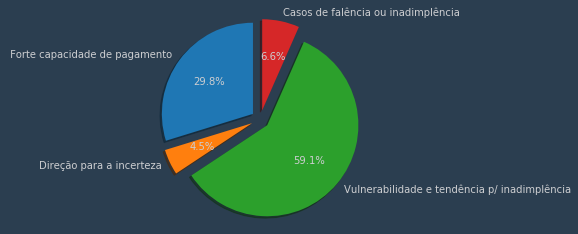

In [156]:
# platar gráfico com o total de empréstimo )

#plt.title('Retas Simples')

labels = [' Forte capacidade de pagamento', 'Direção para a incerteza', 'Vulnerabilidade e tendência p/ inadimplência', 'Casos de falência ou inadimplência']
sizes = [df_good_A.shape[0], df_bad_B.shape[0], df_good_C.shape[0], df_bad_D.shape[0]]

fig1, ax1 = plt.subplots()

ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, explode = (0.1, 0.1, 0.1, 0.1))

ax1.axis('equal')

plt.show()
 

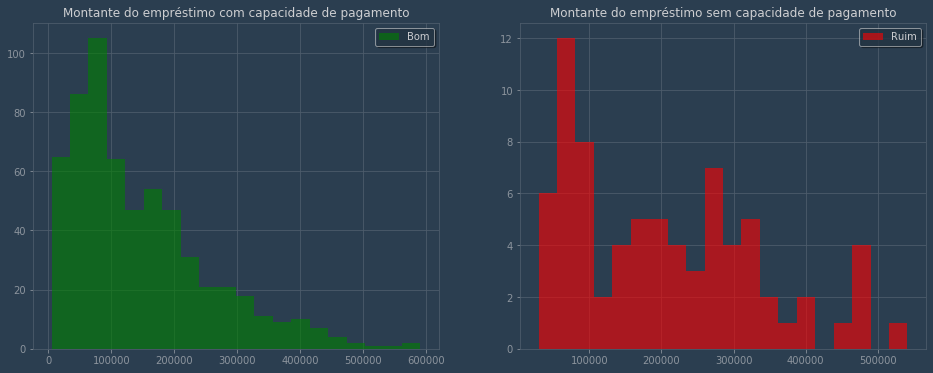

In [157]:
# Montante de emprestimo BOM  OK
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.montante.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.montante.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
ax1.set_title('Montante do empréstimo com capacidade de pagamento')
ax2.set_title('Montante do empréstimo sem capacidade de pagamento')
ax1.legend()
ax2.legend()
plt.show()

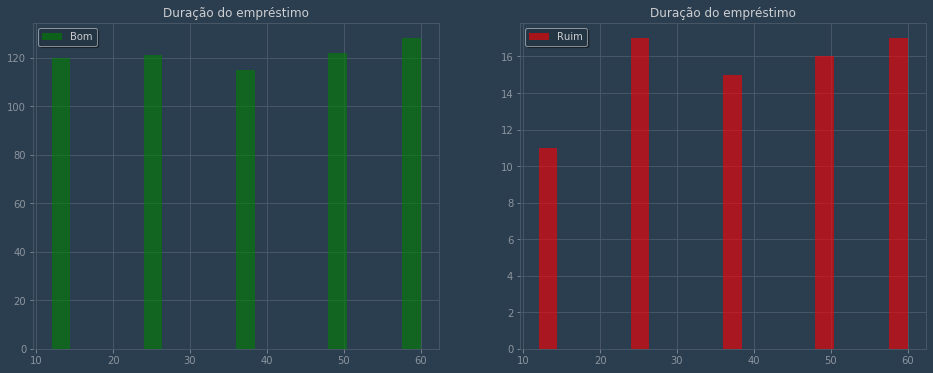

In [158]:
# duração OK

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.duracao.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
#print(df_good.duration)
df_bad.duracao.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
ax1.set_title('Duração do empréstimo')
ax2.set_title('Duração do empréstimo')
ax1.legend()
ax2.legend()
plt.show()

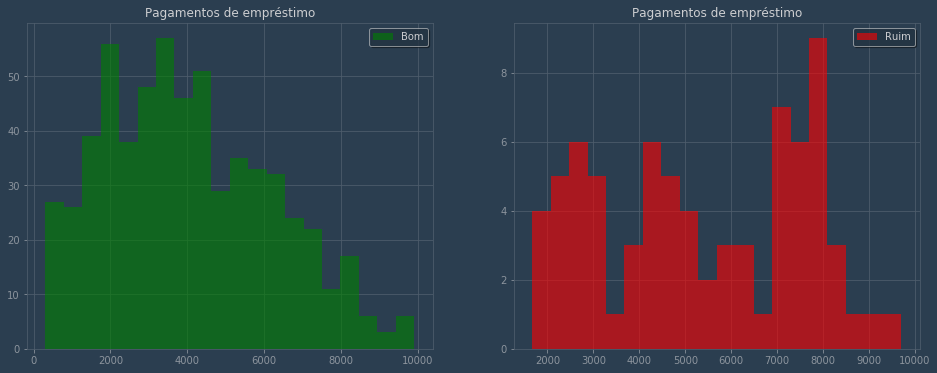

In [159]:
# pagamentos OK
 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.pagamentos.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
  
df_bad.pagamentos.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
 
ax1.set_title('Pagamentos de empréstimo')
ax2.set_title('Pagamentos de empréstimo')
ax1.legend()
ax2.legend()
plt.show() 

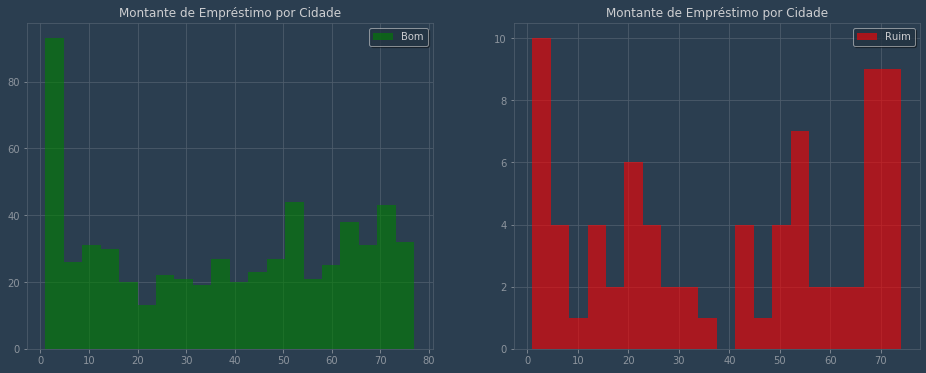

In [160]:
# distrito OK
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.id_cidade.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.id_cidade.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
ax1.set_title('Montante de Empréstimo por Cidade')
ax2.set_title('Montante de Empréstimo por Cidade')
ax1.legend()
ax2.legend()
plt.show()

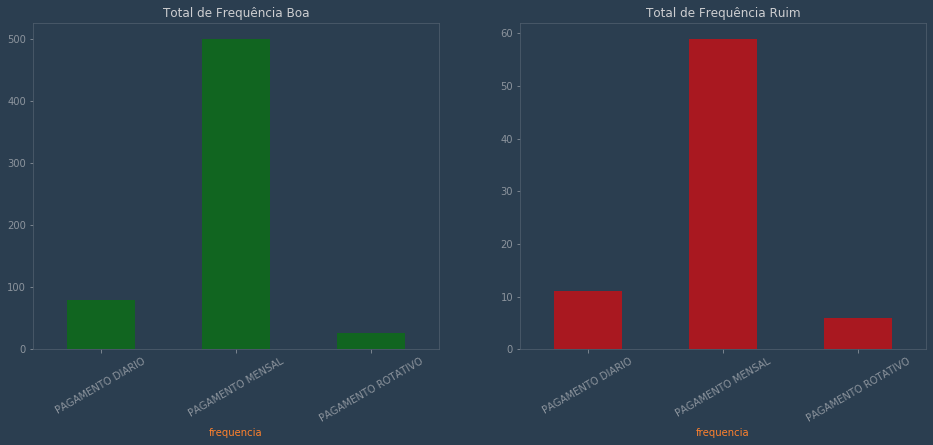

In [161]:
# frequencia  

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

df_good[['id_conta', 'frequencia']].groupby('frequencia').count().plot(
    kind='bar', color='green', rot=30, ax=ax1, alpha=0.6, legend=False)

df_bad[['id_conta', 'frequencia']].groupby('frequencia').count().plot(
    kind='bar', color='red', rot=30, ax=ax2, alpha=0.6, legend=False)

ax1.set_title('Total de Frequência Boa')
ax2.set_title('Total de Frequência Ruim')
#ax1.legend()
#ax2.legend()

plt.show()

In [162]:
# 
query = """
    select tb_emprestimo.date date_loan, tb_conta.date date_acc, status
    from tb_emprestimo join tb_conta using(id_conta);
    """
df = db.to_df(query)

In [163]:
df['date_loan'] = pd.to_datetime(df.date_loan, format='%Y-%m-%d') # dt Emprestimo
df['date_acc'] = pd.to_datetime(df.date_acc, format='%Y-%m-%d')   # dt_ abertura da conta
df['days_between'] = df['date_loan'] - df['date_acc']             # num de dias entre emp - conta
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
#print(df_good)
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

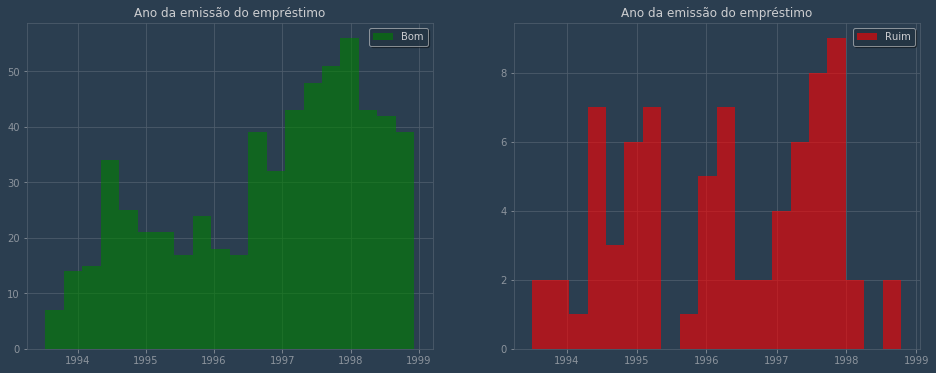

In [164]:
# data de emissão do empréstimo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.date_loan.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.date_loan.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
ax1.set_title('Ano da emissão do empréstimo')
ax2.set_title('Ano da emissão do empréstimo')
ax1.legend()
ax2.legend()
plt.show()

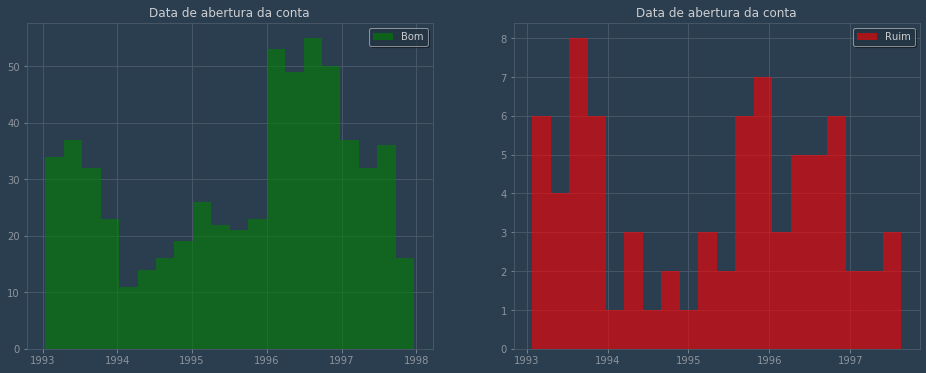

In [165]:
# data de abertura da conta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.date_acc.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.date_acc.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
ax1.set_title('Data de abertura da conta')
ax2.set_title('Data de abertura da conta')
ax1.legend()
ax2.legend()
plt.show()

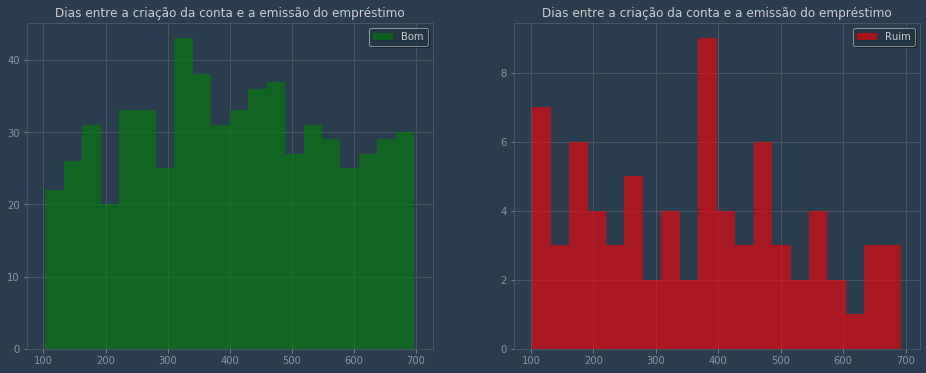

In [166]:
# dias entre
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.days_between.dt.days.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)

df_bad.days_between.dt.days.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)
ax1.set_title('Dias entre a criação da conta e a emissão do empréstimo')
ax2.set_title('Dias entre a criação da conta e a emissão do empréstimo')
ax1.legend()
ax2.legend()
plt.show()

In [167]:
''' Distritos de empréstimos e contas 
 Recursos extraídos:
    - número de habitantes do distrito
    - salário médio da cidade
    - taxa média de desemprego da cidade
    - taxa de empreendedor da cidade
    - taxa média de crime da cidade  '''

' Distritos de empréstimos e contas \n Recursos extraídos:\n    - número de habitantes do distrito\n    - salário médio da cidade\n    - taxa média de desemprego da cidade\n    - taxa de empreendedor da cidade\n    - taxa média de crime da cidade  '

In [168]:
query = """
    select *
    from tb_emprestimo join tb_conta using(id_conta)
    join tb_distrito using(id_cidade);
    """
df = db.to_df(query)

In [169]:
df.head()

,id_cidade,id_conta,id_emprestimo,date,montante,duracao,pagamentos,status,frequencia,date,...,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,30,1787,5314,1993-07-05,96396,12,8033.00,B,PAGAMENTO DIARIO,1993-03-22,...,8,2,10,81.8,9650,3.38,3.67,100,2985,2804
1,46,1801,5316,1993-07-11,165960,36,4610.00,A,PAGAMENTO MENSAL,1993-02-13,...,7,3,10,73.5,8369,1.79,2.31,117,2854,2618
2,45,9188,6863,1993-07-28,127080,60,2118.00,A,PAGAMENTO MENSAL,1993-02-08,...,6,1,5,53.5,8390,2.28,2.89,132,2080,2122
3,12,1843,5325,1993-08-03,105804,36,2939.00,A,PAGAMENTO MENSAL,1993-01-30,...,6,1,6,58.0,8754,3.83,4.31,137,3804,3868
4,1,11013,7240,1993-09-06,274740,60,4579.00,A,PAGAMENTO DIARIO,1993-02-14,...,0,1,1,100.0,12541,0.29,0.43,167,85677,99107


In [170]:
df['n_habitantes'] = df.A4
df['media_salarial'] = df.A11
df['taxa_media_desemprego'] = df[['A12', 'A13']].mean(axis=1)  
df['taxa_empreendedor'] = df['A14']
df['taxa_media_crime'] = df[['A15', 'A16']].mean(axis=1) / df['n_habitantes']

In [171]:
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

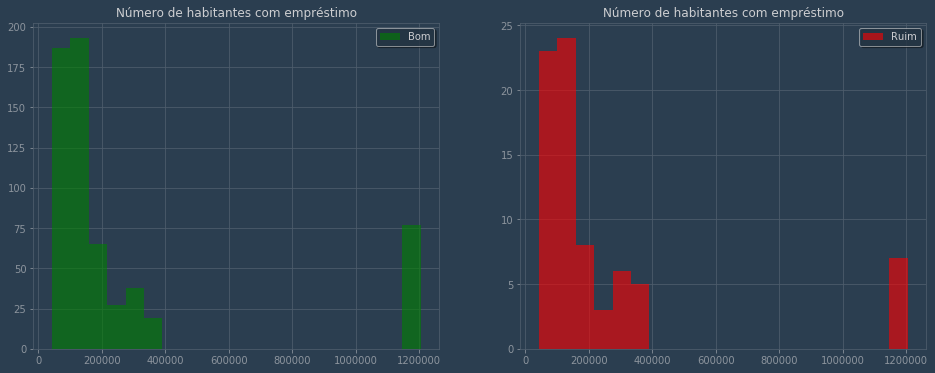

In [172]:
# numero de habitantes     
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.n_habitantes.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.n_habitantes.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Número de habitantes com empréstimo')
ax2.set_title('Número de habitantes com empréstimo')
ax1.legend()
ax2.legend()

plt.show()

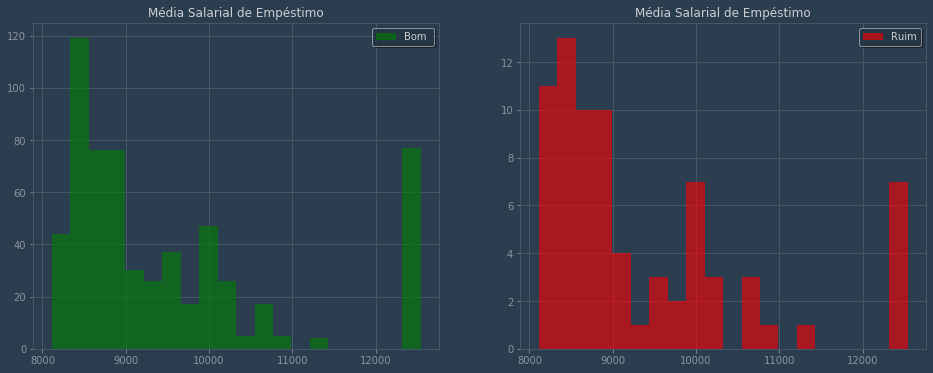

In [173]:
# Média Salarial                      
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.media_salarial.hist(bins=20, ax=ax1, label='Bom ', color='green', alpha=0.6)
df_bad.media_salarial.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Média Salarial de Empéstimo')
ax2.set_title('Média Salarial de Empéstimo')
ax1.legend()
ax2.legend()
plt.show()

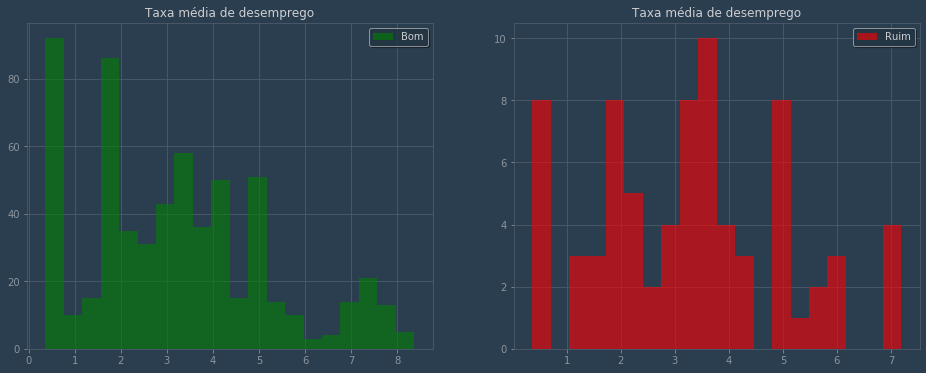

In [174]:
# taxa_media_desemprego  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.taxa_media_desemprego.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.taxa_media_desemprego.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Taxa média de desemprego')
ax2.set_title('Taxa média de desemprego')
ax1.legend()
ax2.legend()
plt.show()

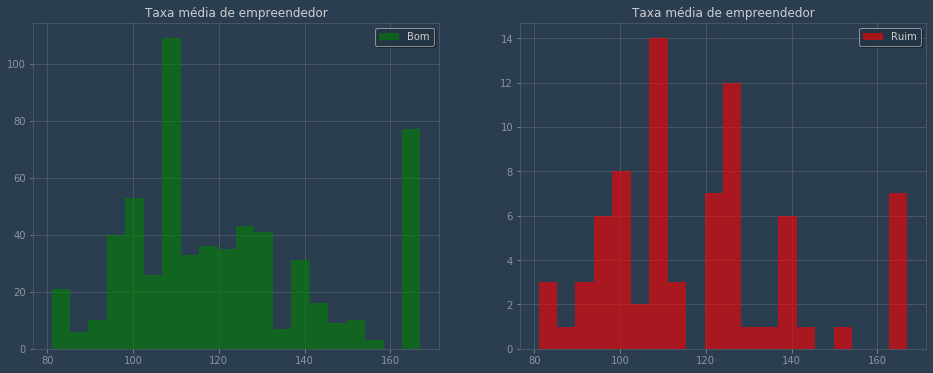

In [175]:
# taxa de empreendedor  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.taxa_empreendedor.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.taxa_empreendedor.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Taxa média de empreendedor')
ax2.set_title('Taxa média de empreendedor')
ax1.legend()
ax2.legend()
plt.show()

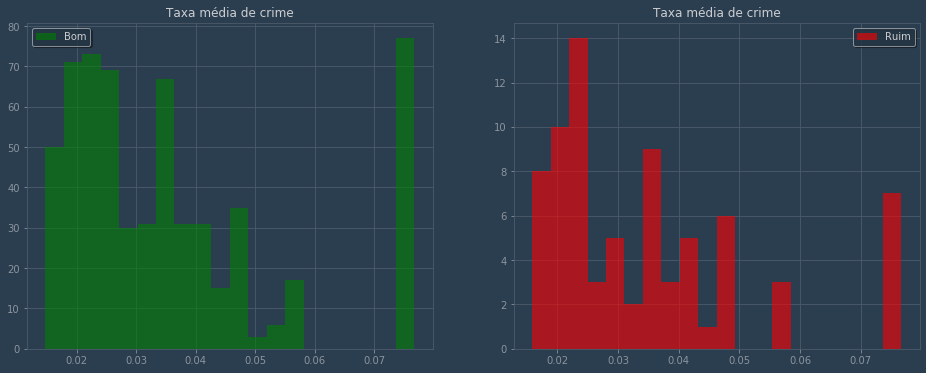

In [176]:
# taxa média de crime  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.taxa_media_crime.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.taxa_media_crime.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Taxa média de crime')
ax2.set_title('Taxa média de crime')
ax1.legend()
ax2.legend()
plt.show()
plt.show()

In [177]:
# Pedidos de empréstimo e pagamento
# Recursos extraídos:
# valor médio do pedido 
query = """
    select *
    from tb_emprestimo;
    """
df = db.to_df(query)

In [178]:
query = """
    select id_conta, montante valor_emprestimo
    from `tb_ordem`
    where id_conta in (
        select id_conta
        from tb_emprestimo);
    """
df_order = db.to_df(query)

In [179]:
df_order['valor_emprestimo'] = df_order.valor_emprestimo.astype('float')

In [180]:
df = df.set_index('id_conta').join(df_order.groupby('id_conta').mean())
df = df.rename(columns={'valor_emprestimo': 'media_valor_emprestimo'})

In [181]:
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

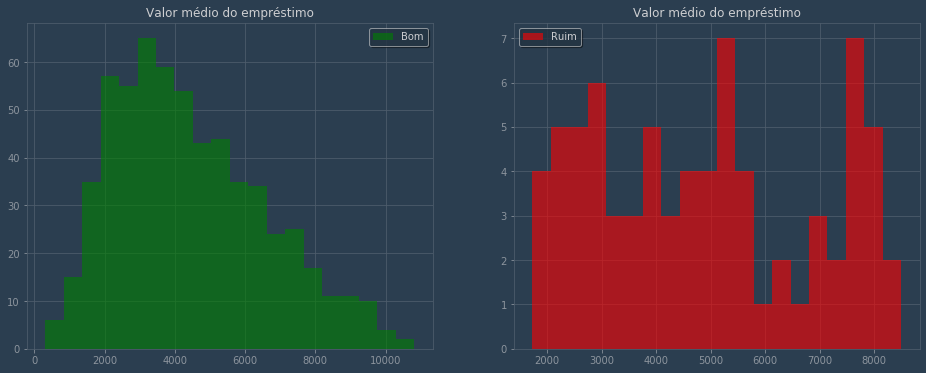

In [182]:
# valor médio do empréstimo                       
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.media_valor_emprestimo.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.media_valor_emprestimo.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Valor médio do empréstimo')
ax2.set_title('Valor médio do empréstimo')
ax1.legend()
ax2.legend()
plt.show()
plt.show()

In [183]:
# Empréstimo e transações
'''Recursos extraídos:
valor médio da transação
saldo médio da transação
número de transações'''

'Recursos extraídos:\nvalor médio da transação\nsaldo médio da transação\nnúmero de transações'

In [272]:
query = """
    select *
    from tb_emprestimo;
    """
df = db.to_df(query)

In [273]:
query = """
    select id_conta, montante trans_montante, balanco trans_balanco
    from tb_transacao
    where id_conta in (
        select id_conta
        from tb_emprestimo);
    """
df_trans = db.to_df(query)

In [274]:
n_trans = df_trans.groupby('id_conta').count().iloc[:, 1]
n_trans.name = 'n_trans'

In [275]:
df_trans = df_trans.groupby('id_conta').mean()
df_trans.columns = ['media_trans_montante', 'media_trans_balanco']

In [276]:
df = df.set_index('id_conta').join(df_trans).join(n_trans)

In [277]:
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

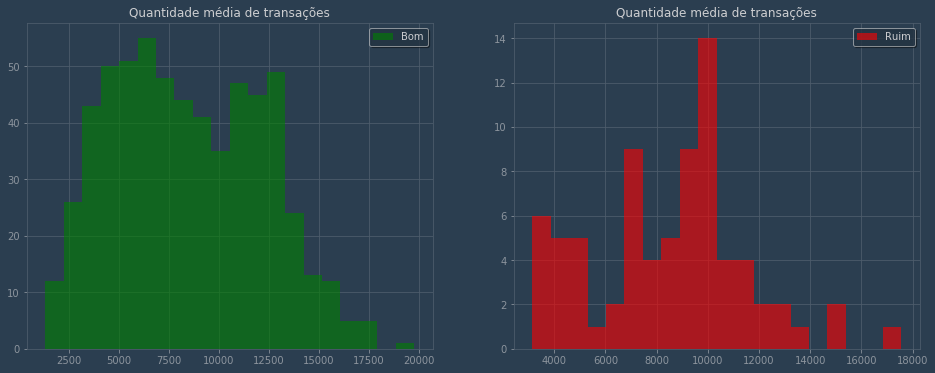

In [278]:
# quantidade média de transações 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.media_trans_montante.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.media_trans_montante.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Quantidade média de transações')
ax2.set_title('Quantidade média de transações')
ax1.legend()
ax2.legend()
plt.show()
plt.show()

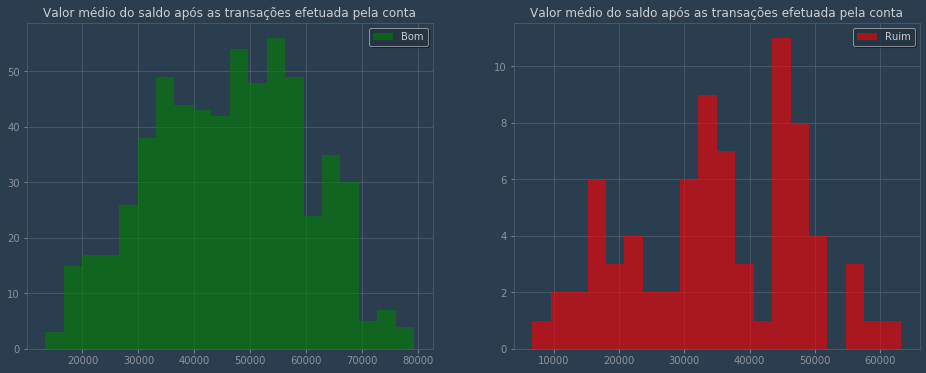

In [281]:
# alor médio do saldo após as transações efetuada pela conta 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.media_trans_balanco.hist(bins=20, ax=ax1, label='Bom', color='green', alpha=0.6)
df_bad.media_trans_balanco.hist(bins=20, ax=ax2, label='Ruim', color='red', alpha=0.6)

ax1.set_title('Valor médio do saldo após as transações efetuada pela conta')
ax2.set_title('Valor médio do saldo após as transações efetuada pela conta')
ax1.legend()
ax2.legend()
plt.show()
plt.show()

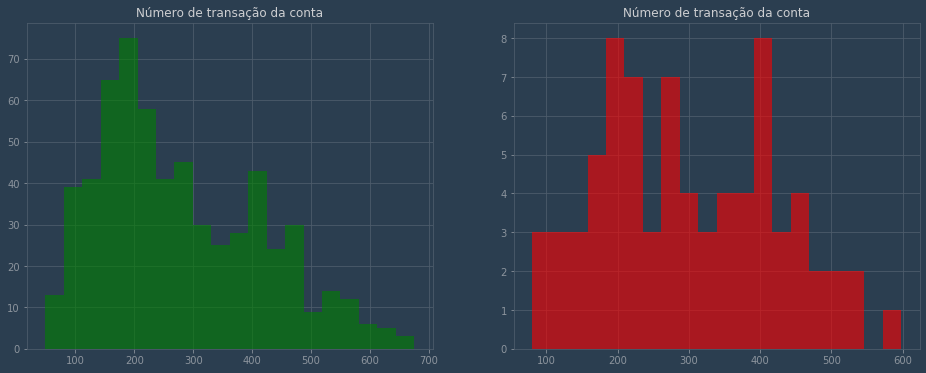

In [280]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.n_trans.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
df_bad.n_trans.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
ax1.set_title('Número de transação da conta') 
ax2.set_title('Número de transação da conta')
plt.show()

In [266]:
# Conta de empréstimo e cartão de crédito
'''Recursos extraídos:
    Tipo de cartao '''

'Recursos extraídos:\n    Tipo de cartao '

In [267]:
query = """
     select id_conta, id_cartao, tb_cartao.tipo as tipo_cartao, status
    from tb_emprestimo join tb_disponivel using(id_conta)
    left join tb_cartao using(id_disp);
    """
df = db.to_df(query)

In [268]:
#  No conjunto de dados, 1 cartão corresponde a apenas 1 conta
df_with_card = df[~df['tipo_cartao'].isna()]
df_with_card.id_cartao.unique().shape[0] == df_with_card.shape[0]

True

In [269]:
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

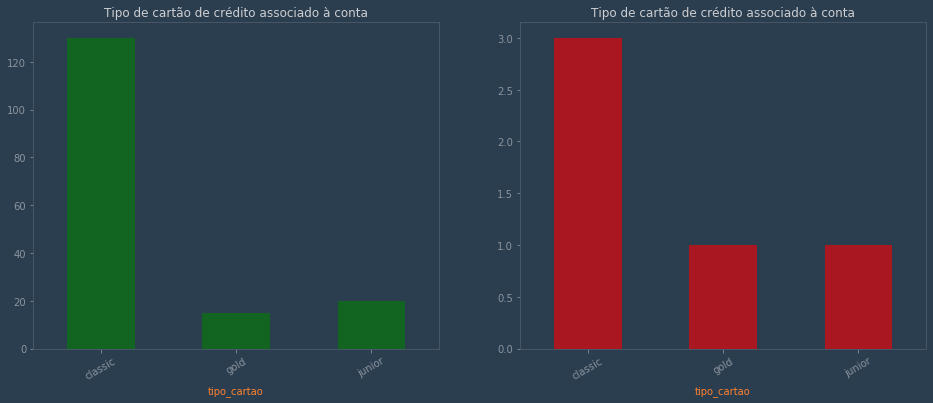

In [270]:
# tipo de cartão      
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good[['id_conta', 'tipo_cartao']].groupby('tipo_cartao').count().plot(
    kind='bar', color='green', rot=30, ax=ax1, alpha=0.6, legend=False) 
df_bad[['id_conta', 'tipo_cartao']].groupby('tipo_cartao').count().plot(
    kind='bar', color='red', rot=30, ax=ax2, alpha=0.6, legend=False)
ax1.set_title('Tipo de cartão de crédito associado à conta') 
ax2.set_title('Tipo de cartão de crédito associado à conta')
plt.show()

In [204]:
# Conta e Cliente
'''Recursos extraídos:
A conta e o proprietário têm o mesmo distrito
gênero do proprietário
idade do dono '''

'Recursos extraídos:\nA conta e o proprietário têm o mesmo distrito\ngênero do proprietário\nidade do dono '

In [253]:
query = """
    select *
    from tb_emprestimo join tb_disponivel using(id_conta)
    join tb_cliente using(id_cliente)
    join tb_distrito using(id_cidade);
    """
df = db.to_df(query) 

In [254]:
query = """
    select id_conta, id_cidade acc_cidade_id
    from tb_emprestimo join tb_conta using(id_conta);
    """
df_acc = db.to_df(query)

In [255]:
# Proprietário da conta e a conta na mesma cidade
df = df.set_index('id_conta').join(df_acc.set_index('id_conta'))
df = df[df['tipo'] == 'OWNER']
df.reset_index(inplace=True)

In [256]:
# No conjunto de dados, no máximo 1 empréstimo pertence ao proprietário da conta     >>>>> ERRO <<<<<<
df['id_conta'].unique().shape[0]

682

In [257]:
df['Mesma_cidade'] = df['id_cidade'] == df['acc_cidade_id']

In [258]:
df['date'] = pd.to_datetime(df.date, format='%Y-%m-%d')
df['dt_nascimento'] = pd.to_datetime(df.dt_nascimento, format='%Y-%m-%d')
df['idade'] = (df['date'] - df['dt_nascimento']).dt.days // 365

In [259]:
df_good = df.loc[(df['status'] == 'A') | (df['status'] == 'C')]
df_bad = df.loc[(df['status'] == 'B') | (df['status'] == 'D')]

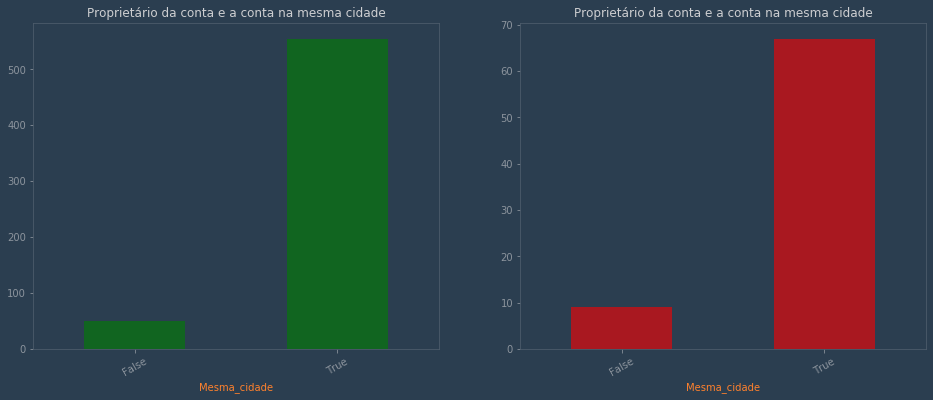

In [264]:
# O proprietário da conta e a conta estão no mesmo distrito    
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good[['id_conta', 'Mesma_cidade']].groupby('Mesma_cidade').count().plot(
    kind='bar', color='green', rot=30, ax=ax1, alpha=0.6, legend=False)

df_bad[['id_conta', 'Mesma_cidade']].groupby('Mesma_cidade').count().plot(
    kind='bar', color='red', rot=30, ax=ax2, alpha=0.6, legend=False)

ax1.set_title('Proprietário da conta e a conta na mesma cidade')
ax2.set_title('Proprietário da conta e a conta na mesma cidade')
 

plt.show()

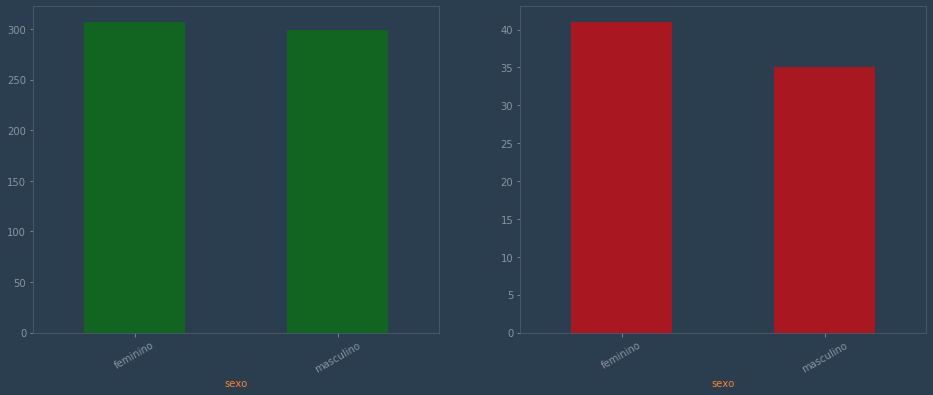

In [261]:
# Sexo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good[['id_conta', 'sexo']].groupby('sexo').count().plot( 
    kind='bar', color='green', rot=30, ax=ax1, alpha=0.6, legend=False)
df_bad[['id_conta', 'sexo']].groupby('sexo').count().plot(
    kind='bar', color='red', rot=30, ax=ax2, alpha=0.6, legend=False)
plt.show()

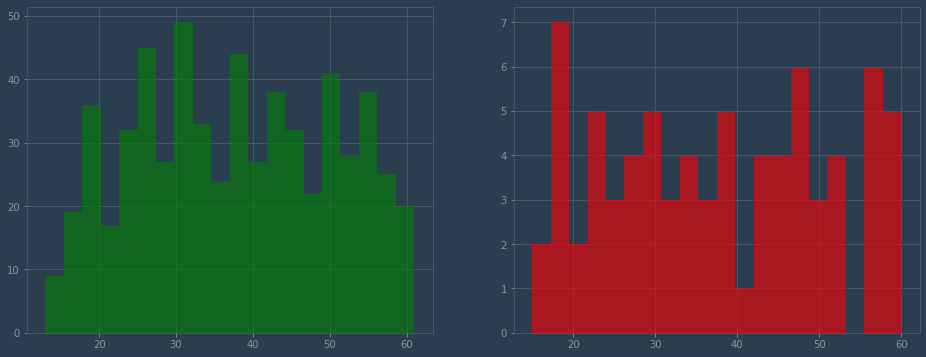

In [262]:
# idade do dono da conta
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
df_good.idade.hist(bins=20, ax=ax1, label='good', color='green', alpha=0.6)
df_bad.idade.hist(bins=20, ax=ax2, label='bad', color='red', alpha=0.6)
plt.show()